In [1]:
import numpy as np 
import pandas as pd


In [ ]:
heart_df = pd.read_csv('heart.csv')

In [ ]:
display(heart_df.head())

In [ ]:
display(heart_df.shape)

In [ ]:
heart_df.info()

In [7]:
heart_df.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_df[heart_df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
heart_df.drop_duplicates(inplace = True)

In [10]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
#import dependencies 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#exploring data analysis
#Define function for figsize
def figsize(width, height):
    plt.figure(figsize=[width, height])
    
#Define function for title, y_axis label and x_axis label.
def labels(title, x_axis, y_axis):
    plt.title(title, fontsize = 16)
    plt.ylabel(y_axis, fontsize = 14)
    plt.xlabel(x_axis, fontsize = 14)
figsize(8,5)
sns.countplot(x=heart_df.output)
labels("Distribution of Output", "Output", "Count");

In [ ]:
#Subplot function
def splot(index, row, column):
    plt.subplot(index, row, column)

figsize(30,30)
list_col = list(heart_df.columns)
indices = 0,3,4,7,9,13
list_col1 = [i for j, i in enumerate(list_col) if j not in indices]

i = 1
for col in list_col1:
    splot(4, 3, i)
    sns.countplot(x=heart_df.output, hue=heart_df[col]);
    labels(f"Distribution of Output by {col}", f"{col}", "Count");
    i= i+1

In [ ]:
#observations
list_col2 = [i for j, i in enumerate(list_col) if j in indices]
figsize(20,15)
indices = 0,3,4,7,9
list_col2 = [i for j, i in enumerate(list_col) if j in indices]

sns.boxplot(data=heart_df, x='output', y= f'{col}');
i = 1
for col in list_col2:
    splot(2, 3, i)
    sns.boxplot(data=heart_df, x='output', y= col);
    labels(f"Output vs {col}", f"{col}", "Count");
    i= i+1

In [ ]:
#Machine learning -logistic regression

X = heart_df.drop("output", axis=1).values
X.shape

In [ ]:
y = heart_df.output.values
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [20]:
#training the model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
model.score(X_train, y_train)

0.8755186721991701

In [ ]:
#evaluating model accuracy

In [22]:
model.score(X_test, y_test)

0.8524590163934426

In [23]:
#Checking for imbalance in the output class
heart_df.output.value_counts(normalize=True)

1    0.543046
0    0.456954
Name: output, dtype: float64

In [ ]:
# hyperparameter tuning - GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()

parameters = {"penalty":["l1", "l2"], "max_iter":[100, 1000, 10000]}

In [26]:
grid_model = GridSearchCV(model, parameters, cv=5)
grid_model.fit(X, y)

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The sco

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2']})

In [27]:
display(grid_model.best_params_)

best_score = grid_model.best_score_
display(best_score)

{'max_iter': 1000, 'penalty': 'l2'}

0.8376502732240437

In [28]:
predictions = grid_model.predict(X_test)

In [ ]:
#model evalution - confusion matrix

In [29]:
from sklearn import metrics

In [30]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[24  5]
 [ 4 28]]


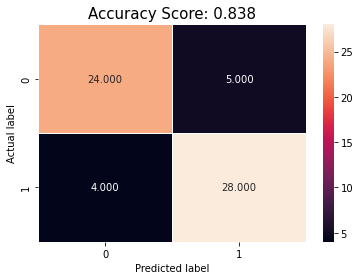

In [31]:
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(best_score,3))
plt.title(all_sample_title, size = 15);

In [33]:
#conclusion project accuracy is with 83.8%